# Random Forests

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plotDecisionRegion(X, clf, pts):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.clf()
    cmap = plt.get_cmap('cool')
    plt.contourf(xx, yy, Z, alpha=0.2)
    i = 0
    for pt in pts:
        plt.scatter(pt[0], pt[1], cmap=cmap, label='Category {}'.format(i))
        i += 1
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

## Load some dummy data

We again use the moon dataset to create some dummy data for our classification.

In [3]:
X, y = make_moons(n_samples=500, noise=0.26)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Plot the training data

In [4]:
x_circ_1 = []
y_circ_1 = []
x_circ_2 = []
y_circ_2 = []
for i in range(len(y_train)):
    if y_train[i] == 0:
        x_circ_1.append(X_train[i][0])
        y_circ_1.append(X_train[i][1])
    else:
        x_circ_2.append(X_train[i][0])
        y_circ_2.append(X_train[i][1])

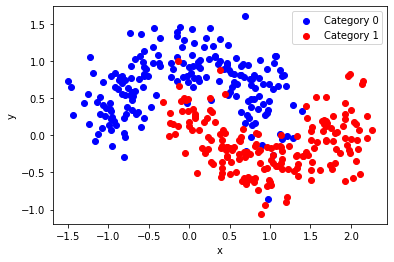

In [5]:
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Use a random forest classifier

We use a bagging classifier based on 500 decision tree classifiers with 100 training samples each.

In [6]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

### Check the accuracy

In [7]:
y_predict = rnd_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.944

### Plot the decision regions

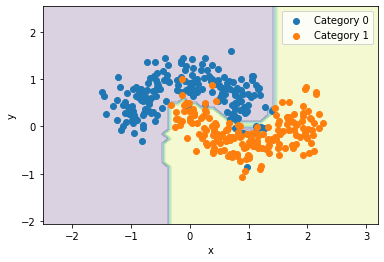

In [9]:
plotDecisionRegion(X_train, rnd_clf, [[x_circ_1, y_circ_1], [x_circ_2, y_circ_2]])

## Load the iris dataset

We use the iris dataset and train on all features.

In [20]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train a random forest on the set

In [29]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

## Evaluate the set

In [30]:
y_predict = rnd_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9736842105263158

## Check the feature importance

In [31]:
for feat, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print('{}: {}'.format(feat, score))

sepal length (cm): 0.1066713251128998
sepal width (cm): 0.029347858793544575
petal length (cm): 0.44373874229901755
petal width (cm): 0.42024207379453804


It seems that petal lengths and widths are almost equally important features, and both are significantly more important than sepal length and width (with the latter being the least important feature in the data set).